- By [lazarusA](https://lazarusa.github.io/Webpage/index.html)

In [1]:
using CairoMakie, ColorSchemes, Colors
include("makieTheme2.jl") # don't forget to include the theme. 

In [2]:
function circleShape(h,k; r= 1, n = 100)
    θ = 0:360÷n:360
    r*sind.(θ) .+ h, r*cosd.(θ) .+ k
end

circleShape (generic function with 1 method)

In [3]:
cmap = reverse(get(colorschemes[:Spectral_10], LinRange(0,1,30))) # deep
cmap = reshape(cmap, (5,6)) ;

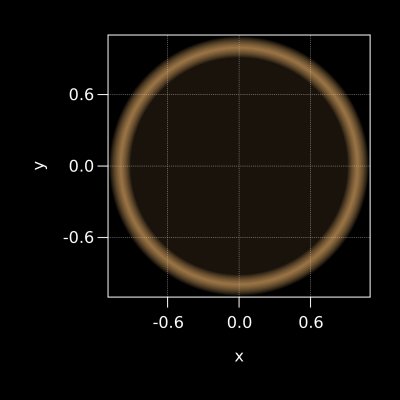

In [4]:
fig = Figure(resolution = (400, 400), font = :sans)
ax  = Axis(fig,aspect = DataAspect(), xlabel = "x", ylabel ="y")
poly!(circleShape(0,0), color = (cmap[4,4], 0.1))
# glow at the edge
[lines!(circleShape(0,0), color = (cmap[4,4], 0.08), linewidth = 0.8 + 2*i) for i in 1:10]

fig[1,1] = ax
#save("./results/FigGlowCircle.png", fig, px_per_unit = 2)
fig

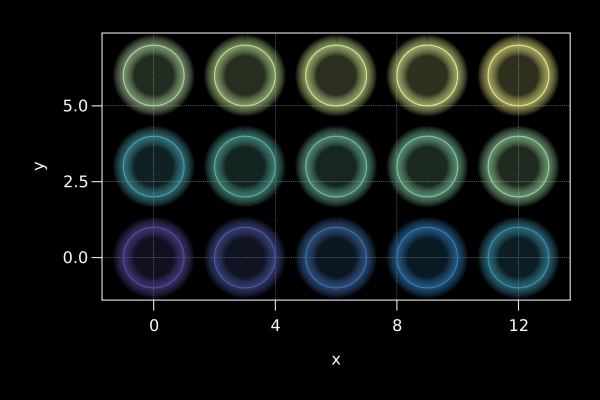

In [7]:
fig = Figure(resolution = (600, 400), font = :sans)
ax  = Axis(fig,aspect = DataAspect(), xlabel = "x", ylabel ="y")
[poly!(circleShape(h,k), color = (cmap[ih,ik], 0.2)) for (ih,h) in enumerate(0:3:12), (ik,k) in enumerate(0:3:8)]
[lines!(circleShape(h,k), color = (cmap[ih,ik], 1)) for (ih,h) in enumerate(0:3:12), (ik,k) in enumerate(0:3:8)]
# glow at the edge
[lines!(circleShape(h,k), color = (cmap[ih,ik], 0.08),linewidth = 0.8 + 2*i) 
    for i in 1:10, (ih,h) in enumerate(0:3:12), (ik,k) in enumerate(0:3:8)]

fig[1,1] = ax
#save("./results/FigGlowCircles.png", fig, px_per_unit = 2)
fig

ngonShape (generic function with 1 method)

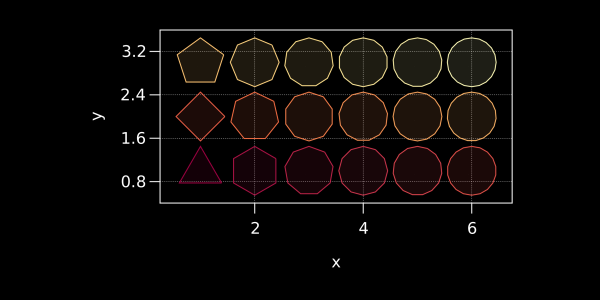

In [9]:
using CairoMakie, ColorSchemes, Colors
include("makieTheme2.jl")

function ngonShape(h, k, r, n)
    x = [h .+ r*sin.(m*2π/n) for m in 1:n]
    y = [k .+ r*cos.(m*2π/n) for m in 1:n]
    x, y
end
function ngonShapes()
    cmap = get(colorschemes[:Spectral_11], LinRange(0,1,36))
    cmap = reshape(cmap, (6,6)) 
    fig = Figure(resolution = (600, 300), font = :sans)
    ax  = Axis(fig,aspect = DataAspect(), xlabel = "x", ylabel ="y")
    c = 1
    for i in 1:6, j in 1:3
        x, y = ngonShape(i, j, 0.45, 2 + c)
        x, y = push!(x, x[1]), push!(y, y[1])
        lines!(x,y, color = (cmap[i,j], 1), linewidth = 1) 
        poly!((x,y), color = (cmap[i,j], 0.12))
        annotations!(["$(c+2)"], [Point.(i-0.06,j-0.08)], textsize = 0.2, color = :white)
        c += 1
    end
    fig[1,1]= ax
    fig
end
fig = ngonShapes()
#save("./results/FigngonShapes.png", fig, px_per_unit = 2)
fig